<a href="https://colab.research.google.com/github/sirleudo/sigmoidal_data_science/blob/master/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressão Logística
A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style("whitegrid")

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print(f'Tamanho do df: {(df.shape)}.\n')
df.head()

Tamanho do df: (303, 14).



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Etapas para construir um modelo de regressão logística dividindo o `dataset`entre treino e teste.

In [7]:
# 1. escolher e importar o modelo
from sklearn.linear_model import LogisticRegression

# 2. instalar e escolher os hyperparameters
model = LogisticRegression()

# 3. separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. fazer previsões em cima de novos dados
X_test = scaler.transform(X_test) # padronizar os daods de teste
y_pred = model.predict(X_test)


In [8]:
# imprimir relatorio de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        40
           1       0.96      0.69      0.81        36

    accuracy                           0.84        76
   macro avg       0.87      0.83      0.84        76
weighted avg       0.87      0.84      0.84        76



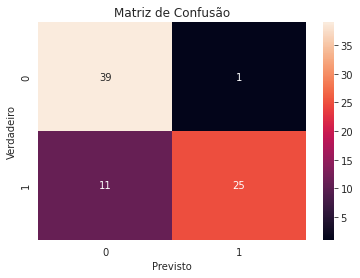

In [11]:
# plotar matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

### Probabilidade associada a cada previsão

In [21]:
# probabilidade em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print(f"y_pred: \n {(y_pred[0:5])}")
print(f"\ny_proba: \n{(y_prob[0:5])} ")

y_pred: 
 [0 0 0 0 0]

y_proba: 
[[0.98423158 0.01576842]
 [0.7432632  0.2567368 ]
 [0.84524599 0.15475401]
 [0.95354675 0.04645325]
 [0.94281122 0.05718878]] 
